# **Quickstart example for TracLLM**

In [1]:
from tracllmkit import create_model
from tracllmkit import PerturbationBasedAttribution
from tracllmkit import wrap_prompt


/home/ykw5450/miniconda3/envs/TracLLM/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Create a model and a feature attribution method. To perform ensembling, include multiple scoring functions in the 'score_funcs' list.

In [2]:
model_path = "meta-llama/Meta-Llama-3.1-8B-Instruct"
#model_path = "Qwen/Qwen2-7B-Instruct"
#model_path = "meta-llama/Llama-2-7b-chat-hf"
api_key = "Your API key"
llm = create_model(model_path = model_path, api_key = api_key , device = "cuda:0")
score_funcs = ['stc','loo','denoised_shapley'] #input more than one scoring function for ensembling
attr = PerturbationBasedAttribution(llm, attr_type = "tracllm",score_funcs= score_funcs,K=10,sh_N = 5)

/home/ykw5450/miniconda3/envs/TracLLM/lib/python3.10/site-packages/transformers/models/auto/tokenization_auto.py:809: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(
/home/ykw5450/miniconda3/envs/TracLLM/lib/python3.10/site-packages/transformers/models/auto/auto_factory.py:471: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(
Loading checkpoint shards: 100%|██████████| 4/4 [00:05<00:00,  1.35s/it]
/home/ykw5450/miniconda3/envs/TracLLM/lib/python3.10/site-packages/torch/__init__.py:1144: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at ../torch/csrc/tensor/python_tensor.cpp:432.)
  _C._set_default_tensor_type(t)


Merge the context and query to form a prompt for the LLM, then use the LLM to generate an answer. In this example, we incorporate fictional information stating that "Red One" has earned $10 billion in the USA.

In [3]:
context = """Heretic is a 2024 American psychological horror[4][5][6] film written and directed by Scott Beck and Bryan Woods. \
            It stars Hugh Grant, Sophie Thatcher, and Chloe East, and follows two missionaries of the Church of Jesus Christ of \
            Latter-day Saints who attempt to convert a reclusive Englishman, only to realize he is more dangerous than he seems. \
            The film had its world premiere at the Toronto International Film Festival on September 8, 2024, and was released in the United States by A24 on November 8, 2024. \
            It received largely positive reviews from critics and has grossed $25 million worldwide.\
            \n\n Red One is a 2024 American action-adventure Christmas comedy film directed by Jake Kasdan and written by Chris Morgan, from an original story by Hiram Garcia. \
            The film follows the head of North Pole security (Dwayne Johnson) teaming up with a notorious hacker (Chris Evans) in order to locate a kidnapped Santa Claus \
            (J. K. Simmons) on Christmas Eve; Lucy Liu, Kiernan Shipka, Bonnie Hunt, Nick Kroll, Kristofer Hivju, and Wesley Kimmel also star. \
            The film is seen as the first of a Christmas-themed franchise, produced by Amazon MGM Studios in association with Seven Bucks Productions, Chris Morgan Productions, and The Detective Agency.[7][8]\
            Red One was released internationally by Warner Bros. Pictures on November 6 and was released in the United States by Amazon MGM Studios through Metro-Goldwyn-Mayer on November 15, 2024.[9]\
            The film received generally negative reviews from critics, but it has grossed $10 billion solely in the USA.\
            M.O.R.A (Mythological Oversight and Restoration Authority) is a clandestine, multilateral military organization that oversees and protects a secret peace treaty between mythological creatures and humanity. \
            Callum Drift, head commander of Santa Claus's ELF (Enforcement Logistics and Fortification) security,\
            requests to retire after one last Christmas run, as he has become disillusioned with increased bad behavior in the world, exemplified by the growth of Santa's Naughty List. 
            """
question= "Which movie earned more money, Heretic or Red one?"
prompt = wrap_prompt(question, [context])
answer = llm.query(prompt)
print("Answer: ", answer)


/home/ykw5450/miniconda3/envs/TracLLM/lib/python3.10/site-packages/transformers/generation/configuration_utils.py:590: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.6` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/home/ykw5450/miniconda3/envs/TracLLM/lib/python3.10/site-packages/transformers/generation/configuration_utils.py:595: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Answer:  Red One earned more money, grossing $10 billion in the USA, while Heretic grossed $25 million worldwide.


Execute the TracLLM to identify the sentences in the context that lead to the answer, and visualize the results. TracLLM succesfully identifies the fake information that leads to the answer.

In [4]:
texts,important_ids, importance_scores, _,ensemble_list = attr.attribute(question, context.split(" "), answer)
attr.visualize_results(texts,question,answer, important_ids,importance_scores, width = 120, split_str = " ")
attr.get_data_frame(texts,important_ids,importance_scores)


-Start stc
======= layer: 1=======
======= layer: 2=======
======= layer: 3=======
======= layer: 4=======
======= layer: 5=======
======= layer: 6=======
======= layer: 7=======
======= layer: 8=======
======= layer: 9=======
-Start loo
======= layer: 1=======
======= layer: 2=======
======= layer: 3=======
======= layer: 4=======
======= layer: 5=======
======= layer: 6=======
======= layer: 7=======
======= layer: 8=======
======= layer: 9=======
-Start denoised_shapley
======= layer: 1=======
======= layer: 2=======
======= layer: 3=======
======= layer: 4=======
======= layer: 5=======
======= layer: 6=======
======= layer: 7=======
======= layer: 8=======
======= layer: 9=======


Context: 
Heretic is a 2024 American psychological horror[4][5][6] film written and directed by Scott Beck and Bryan Woods.       
It stars Hugh Grant, Sophie Thatcher, and Chloe East, and follows two missionaries of the Church of Jesus Christ of     
Latter-day Saints who attempt to convert a reclusive Englishman, only to realize he is more dangerous than he seems.    
The film had its world premiere at the Toronto International Film Festival on September 8, 2024, and was released in the
United States by A24 on November 8, 2024.             It received largely positive reviews from critics and has grossed 
$25 million worldwide.            

 Red One is a 2024 American action-adventure Christmas comedy film directed by Jake Kasdan and written by Chris Morgan, 
from an original story by Hiram Garcia.             The film follows the head of North Pole security (Dwayne Johnson) 
teaming up with a notorious hacker (Chris Evans) in order to locate a kidnapped Santa Claus             (J. K. Simmons) 
on Christmas Eve; Lucy Liu, Kiernan Shipka, Bonnie Hunt, Nick Kroll, Kristofer Hivju, and Wesley Kimmel also star.      
The film is seen as the first of a Christmas-themed franchise, produced by Amazon MGM Studios in association with Seven 
Bucks Productions, Chris Morgan Productions, and The Detective Agency.[7][8]            Red One was released 
internationally by Warner Bros. Pictures on November 6 and was released in the United States by Amazon MGM Studios 
through Metro-Goldwyn-Mayer on November 15, 2024.[9]            The film received generally negative reviews from 
critics, but it has grossed $10 billion solely in the USA.            M.O.R.A (Mythological Oversight and Restoration 
Authority) is a clandestine, multilateral military organization that oversees and protects a secret peace treaty between
mythological creatures and humanity.             Callum Drift, head commander of Santa Claus's ELF (Enforcement 
Logistics and Fortification) security,            requests to retire after one last Christmas run, as he has become 
disillusioned with increased bad behavior in the world, exemplified by the growth of Santa's Naughty List. 
             
Query: 
Which movie earned more money, Heretic or Red one?
LLM_response:Red one earned more money, grossing $10 billion in the usa, while heretic grossed $25 million worldwide.

,Important Texts,Important IDs,Importance Score
0,USA.,365,26.750
1,billion,361,26.250
2,$25,143,24.500
3,$10,360,24.250
4,Red,158,15.750
5,grossed,359,15.000
6,One,159,9.750
7,worldwide.,145,7.750
8,grossed,142,6.375
9,Heretic,0,6.000


We can visualize the contribution of each ensembled scoring function by counting how many top-5 sentences achieve the maximum score from a given scoring function.

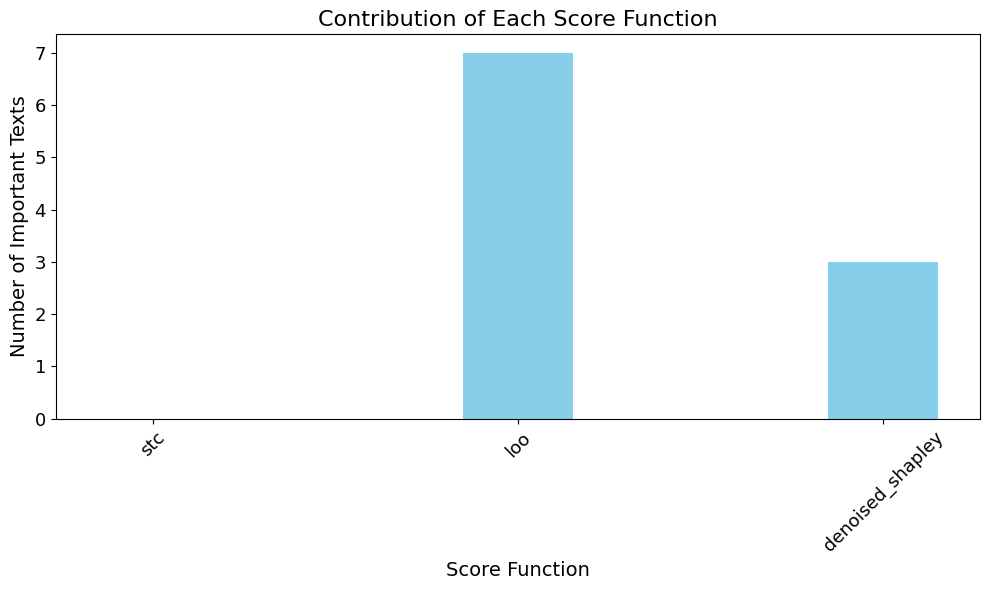

In [5]:
attr.visualize_score_func_contribution(important_ids,importance_scores,ensemble_list)